In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up

### Extracting the data
##### Utilizing Yahoo finance's API to get the relevant that we need

In [2]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statenebt that the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one wants to download
    # credit to John Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [3]:
# creating a list of the ticker names of the stocks we want to use for our portfolio. This will help us in downloading the data from the yf alius library that was declared as well for creating the ticker column in our pandas dataframe
stock_pick = ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']
etf_pick = ['SPY', 'IWM', 'DIA']

# this will download all of the relevant data related to our constituent's of selected stocks and etfs
portfolio_individual = import_securities_data(stock_pick, 1, "y")
portfolio_etf = import_securities_data(etf_pick, 1, "y")

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed


In [4]:
# visualizing the data to make sure all the data was imported correctly
portfolio_individual

Price        Adj Close                                               \
Ticker            AAPL        BND          F         JPM         KO   
Date                                                                  
2023-02-27  147.134644  69.781181  11.297235  138.212524  57.990440   
2023-02-28  146.627350  69.800537  11.306602  139.369476  57.689922   
2023-03-01  144.538513  69.387024  11.540791  138.591690  57.059807   
2023-03-02  145.135330  69.241417  11.756243  137.152786  57.893501   
2023-03-03  150.228134  69.775314  12.252723  139.670883  57.622063   
...                ...        ...        ...         ...        ...   
2024-02-20  181.559998  72.089996  12.250000  179.729996  60.700001   
2024-02-21  182.320007  71.889999  12.140000  180.899994  61.240002   
2024-02-22  184.369995  71.919998  12.120000  183.070007  61.150002   
2024-02-23  182.520004  72.180000  12.140000  183.990005  61.200001   
2024-02-26  181.160004  72.050003  11.950000  183.360001  60.709999   

Price                                   Close                    ...  \
Ticker            MSFT          O        AAPL        BND      F  ...   
Date                                                             ...   
2023-02-27  248.123566  61.355156  147.919998  72.050003  12.06  ...   
2023-02-28  247.389587  60.827259  147.410004  72.070000  12.07  ...   
2023-03-01  244.265259  60.418251  145.309998  71.480003  12.32  ...   
2023-03-02  249.065842  60.960407  145.910004  71.330002  12.55  ...   
2023-03-03  253.211807  61.340881  151.029999  71.879997  13.08  ...   
...                ...        ...         ...        ...    ...  ...   
2024-02-20  402.790009  52.470001  181.559998  72.089996  12.25  ...   
2024-02-21  402.179993  52.689999  182.320007  71.889999  12.14  ...   
2024-02-22  411.649994  52.820000  184.369995  71.919998  12.12  ...   
2024-02-23  410.339996  52.939999  182.520004  72.180000  12.14  ...   
2024-02-26  407.540009  52.490002  181.160004  72.050003  11.95  ...   

Price            Open                           Volume                      \
Ticker             KO        MSFT          O      AAPL       BND         F   
Date                                                                         
2023-02-27  60.180000  252.460007  65.650002  44998500   3340500  60378100   
2023-02-28  59.700001  249.070007  64.489998  50547000   5032400  59796800   
2023-03-01  59.130001  250.759995  63.840000  55479000   4427800  85328800   
2023-03-02  58.840000  246.550003  63.380001  52238100   4966600  78214100   
2023-03-03  59.549999  252.190002  64.389999  70732300   4008600  80080200   
...               ...         ...        ...       ...       ...       ...   
2024-02-20  59.599998  403.239990  52.459999  53665600   7605000  44591000   
2024-02-21  60.990002  400.170013  52.990002  41529700   6625600  41910300   
2024-02-22  60.990002  410.190002  52.669998  52292200  11884200  36980500   
2024-02-23  61.090000  415.670013  52.919998  45074500   6146100  32098900   
2024-02-26  61.240002  411.454987  53.020000  40689520   5255375  39947017   

Price                                              
Ticker           JPM        KO      MSFT        O  
Date                                               
2023-02-27  10014700   8849800  21190000  3981100  
2023-02-28  11019800  16082200  22491000  5975000  
2023-03-01   7139200  13275800  27565300  3625700  
2023-03-02  11106800  11758300  24808200  3244700  
2023-03-03   9513100  13101800  30760100  3574000  
...              ...       ...       ...      ...  
2024-02-20   9668000  18339300  24307900  6095700  
2024-02-21   7027900  14378300  18631100  6532000  
2024-02-22   9296500  12982800  27009900  5764000  
2024-02-23   7103600  13602400  16284800  5177900  
2024-02-26   7136945   7563261  15929424  5110892  

[251 rows x 42 columns]

In [5]:
# visualizing the data to make sure all the data was imported correctly
portfolio_etf

Price        Adj Close                               Close              \
Ticker             DIA         IWM         SPY         DIA         IWM   
Date                                                                     
2023-02-27  322.718140  185.407318  391.775543  329.059998  188.169998   
2023-02-28  320.276123  185.417175  390.327576  326.570007  188.179993   
2023-03-01  320.697815  185.653656  388.830292  327.000000  188.419998   
2023-03-02  324.071533  186.097061  391.854309  330.440002  188.869995   
2023-03-03  327.768860  188.688431  398.138794  334.209991  191.500000   
...                ...         ...         ...         ...         ...   
2024-02-20  385.690002  198.880005  496.760010  385.690002  198.880005   
2024-02-21  386.049988  197.940002  497.209991  386.049988  197.940002   
2024-02-22  390.540009  199.440002  507.500000  390.540009  199.440002   
2024-02-23  391.279999  199.889999  507.850006  391.279999  199.889999   
2024-02-26  390.709991  201.149994  505.989990  390.709991  201.149994   

Price                         High                                 Low  \
Ticker             SPY         DIA         IWM         SPY         DIA   
Date                                                                     
2023-02-27  397.730011  331.980011  190.199997  401.290009  328.200012   
2023-02-28  396.260010  328.869995  190.020004  399.279999  326.510010   
2023-03-01  394.739990  327.820007  189.490005  396.690002  325.299988   
2023-03-02  397.809998  331.200012  189.300003  398.690002  326.799988   
2023-03-03  404.190002  334.429993  191.929993  404.450012  330.420013   
...                ...         ...         ...         ...         ...   
2024-02-20  496.760010  386.570007  199.720001  498.410004  384.540009   
2024-02-21  497.209991  386.170013  198.350006  497.369995  383.320007   
2024-02-22  507.500000  391.470001  200.089996  508.489990  387.910004   
2024-02-23  507.850006  392.839996  201.139999  510.130005  390.920013   
2024-02-26  505.989990  392.399994  201.639999  508.750000  390.234985   

Price                                     Open                          \
Ticker             IWM         SPY         DIA         IWM         SPY   
Date                                                                     
2023-02-27  187.600006  396.750000  330.730011  189.130005  399.869995   
2023-02-28  188.070007  396.149994  328.869995  188.119995  397.230011   
2023-03-01  187.190002  393.380005  326.040009  188.190002  395.410004   
2023-03-02  186.119995  392.329987  327.570007  186.860001  392.679993   
2023-03-03  188.419998  399.029999  331.519989  189.669998  399.709991   
...                ...         ...         ...         ...         ...   
2024-02-20  198.009995  494.450012  385.510010  199.149994  497.720001   
2024-02-21  196.389999  493.559998  384.959991  197.660004  495.420013   
2024-02-22  197.809998  503.019989  388.359985  198.649994  504.010010   
2024-02-23  198.570007  507.100006  391.769989  199.600006  509.269989   
2024-02-26  199.149994  505.859985  391.450012  199.690002  508.299988   

Price        Volume                      
Ticker          DIA       IWM       SPY  
Date                                     
2023-02-27  2887300  17562900  80444700  
2023-02-28  3155300  19542600  96438600  
2023-03-01  3317500  22532800  99706800  
2023-03-02  3047500  18104400  85127800  
2023-03-03  3033500  22774300  90120000  
...             ...       ...       ...  
2024-02-20  3295700  30547500  71736700  
2024-02-21  3031600  28821500  59603800  
2024-02-22  4990700  38184700  76402500  
2024-02-23  3451200  37616800  61284200  
2024-02-26  1911663  28753599  44967703  

[251 rows x 18 columns]

In [6]:
# creating a definition function in order to be able to the take data that I create for each of the columns through code and put it into the original dataframe named under the variable 'df'. this is a repetitive task everytime im trying to create the data for every column nad putting into calumn into pandas dataframe
def import_data(dest_df, origin_df, column_name):

    # making the dataset into a dataframe in order to merge the data with the original dataset
    df1 = pd.DataFrame(origin_df)

    # reseting the index so that it doesnt cause trouble when im trying to iterate through the data in the for loop
    df1.reset_index(inplace= True)

    # iterating through the pandas dataframe and separating the index and values with index and val variables. in this case, val variable holds the ticker symbol and the numbers for the annualized volatility
    for index, val in df1[['Ticker', 0]].iterrows():

        # setting a variable for ticker and extracting the ticker as the ticker is together with the annualized volatility data under the val variable
        ticker = val['Ticker']
        value = val[0]

        # making sure that the data its iterating through matches with one of the tickers in my orginal dataset, the 'df' variable 
        if ticker in dest_df['ticker'].values:

            # when it finds that match with the ticker in the original data set it then uses loc to locate in what row the ticker is and then it creates the annualize_volatility column to append the value to that row in that column
            dest_df.loc[dest_df['ticker'] == ticker, f'{column_name}'] = value
    
    return

# Part 1

#### Creating Portfolio Pandas Dataframe

##### Ticker Column

In [7]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# here ticker is the title of our column and the list with the stock symbols is our values within our column that has the title ticker
stock_pick_dict = { 'ticker': ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']}

# creating the dataframe using pandas library
df = pd.DataFrame(stock_pick_dict)

# visualizing the dataframe
df

,ticker
0,AAPL
1,MSFT
2,F
3,O
4,BND
5,KO
6,JPM


 ##### Portfolio Weight (Equally Weighted) Column

In [8]:
# all assets that are being held in this portfolio are equal weighted. so we want to make sure of that by taking the total of a pie, 100%, and divide it by the count of stocks that we have within our portfolio
df['portfolio_weight'] = np.divide(1, df['ticker'].count()).round(4)

df

,ticker,portfolio_weight
0,AAPL,0.1429
1,MSFT,0.1429
2,F,0.1429
3,O,0.1429
4,BND,0.1429
5,KO,0.1429
6,JPM,0.1429


##### Annualized Volatility (Trailing 3 Month) Column

In [9]:
# filtering for data from three months ago using the pandas query function. credit to @https://stackoverflow.com/questions/59692194/pandas-filter-data-that-are-in-last-n-month-using-query

# creating a variable to get todays full date
now = pd.to_datetime('now')

# creating a variable that offsets today's date by 3 months
last_three_months = now - pd.DateOffset(months=3)

# leverging query dunction to filter for all of the data that is less than and equal to the offsetted data. This means that we've filtered for data between now and three months ago
portfolio_three_month_trail = portfolio_individual['Adj Close'].query('Date >= @last_three_months')

# visualizing data to check if the code is working correctly
portfolio_three_month_trail.tail()

Ticker,AAPL,BND,F,JPM,KO,MSFT,O
Date,,,,,,,
2024-02-20,181.559998,72.089996,12.25,179.729996,60.700001,402.790009,52.470001
2024-02-21,182.320007,71.889999,12.14,180.899994,61.240002,402.179993,52.689999
2024-02-22,184.369995,71.919998,12.12,183.070007,61.150002,411.649994,52.820000
2024-02-23,182.520004,72.180000,12.14,183.990005,61.200001,410.339996,52.939999
2024-02-26,181.160004,72.050003,11.95,183.360001,60.709999,407.540009,52.490002


In [10]:
# setting a definition method to calculate the annual volatility of the stock portfolio
def calc_annual_vol(portfolio):

    # calculating the percentage change to get the daily returns
    daily_returns_data = portfolio.pct_change()

    # getting the annualized volatility for each of the stocks. Credit to Yves Hilpisch the author for the python for finance V.2018 (pg.19)
    annualized_volatility_data = (daily_returns_data.std() * np.sqrt(252)).round(4)

    return annualized_volatility_data

In [11]:
# using definition method to import the three month trailing portfolio and calculate the annual volatility of the portfolio
annualized_volatility_data = calc_annual_vol(portfolio_three_month_trail)

# creating a column for annualized volatility and importing the data to the respective ticker using the import data definition function
import_data(df, annualized_volatility_data, 'annualized_volatility')

# checking original dataset to make sure all of the data was appended to the corresponding ticker
df


,ticker,portfolio_weight,annualized_volatility
0,AAPL,0.1429,0.1754
1,MSFT,0.1429,0.1728
2,F,0.1429,0.3451
3,O,0.1429,0.2051
4,BND,0.1429,0.0675
5,KO,0.1429,0.1231
6,JPM,0.1429,0.1213


##### Beta Againts ETFs (SPY, IWM, DIA) (Using Trailing 12-months) Columns

In [12]:
# creating a definition function to calculate beta. credit to: https://github.com/sammuharem/beta-calculator/blob/main/Stock%20Beta%20Calculator.py look at the calculatebeta function
def beta_calc(stock_returns, market_returns):
    
    # calculating covariance of stock returns and market returns, using numpy's universal functions 
    covariance = np.cov(stock_returns, market_returns)

    # caluculating variance of market returns, using numpy's universal functions 
    variance = np.var(market_returns)
    
    # implementing the beta formula. here we are extracting the covariance of the stock market returns and market returns from the matrix that was created in the previous code with the covariance variable. we then take that covariance and divide it by the variance formula and return the value of that formula as the result of using the definition function
    return covariance[0,1] / variance

In [13]:
# calculating portfolio's stocks returns
stock_adjclose_returns = portfolio_individual['Adj Close'].pct_change()

# calculating etf returns
etf_adjclose_returns = portfolio_etf['Adj Close'].pct_change()

# reseting the index so that it doesnt cause problems when trying to iterate through the dataset
stock_adjclose_returns.reset_index(inplace= True)
etf_adjclose_returns.reset_index(inplace= True)

In [14]:
# the logic of this for loop is to grab an etf and then get all stocks on our portfolio along with the returns data to calculate the beta of all of the stocks against that one selected etf. then after it is done calculating the beta for each of the stocks against that one etf, it goes back and pulls another etf and starts calculating the beta for each of the stocks against the new selected etf

# looping through etf returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed etf and etf data holds the data related to the returns values
for etf_ticker, etf_data in etf_adjclose_returns.iloc[1:,1:].items():
    
    # this a counter variable, set up so that the for loop that is below can loop the same amount of times as the count of stocks that we have on our portfolio, which is 7. so we want the for loop to loop 7 times so that we can loop through all of the stock tickers
    counter = 0

    # looping through stock returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed stock and stock data holds the data related to the stock's returns values. the iloc ignores the first row containing nan values and skips the first column which contains date related data. item method seperates the data into index and series data, for example apple as the index and the returns as the series of the index
    for stock_ticker, stock_data in stock_adjclose_returns.iloc[1:,1:].items():
        
        # this is variable set up to calculate the beta of a stock returns against the returns of an etf. In this case we have grabbed one etf and we are looping through the list of stock symbols and extracting their respective returns data and applying the beta calculator method that we have created 
        beta = beta_calc(stock_data, etf_data)

        # takes the ticker that was selected from the for loop and finds the respective ticker's row in the original dataframe, named under the variable 'df'. Then, it creates a new column or finds the respective column and inputs the value respective to the row that the ticker matched on the original dataframe 
        df.loc[df['ticker'] == stock_ticker, f'Beta against {etf_ticker}'] = beta

        # this adds a 1 to the counter variable every time the for loop loop's through the set of instructions
        counter += 1

        # the purpose of this if statement is to renew counter to 0 if it equals the count of stocks that we have picked for our portfolio under our variable that contains the list of the stock symbls we have chosen. we do this because we want to only loop throughout the for loop only for the amount of stocks that we have in our portfolio
        if counter == len(stock_pick): 
            
            # if we have reached the count of ticker symbols in our portfolio, then we reset our counter by making it equal to 0 for the next for loop to happen
            counter = 0

            # lastly we set a break in order to get out of the loop and go back all the way back to the for loop with the etf data in order to grab the next etf that we want to compare our stocks against as our market
            break
            

In [15]:
# viewing the data to make sure all of the data was appended to the correct stock ticker
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY
0,AAPL,0.1429,0.1754,0.943555,0.352576,1.075888
1,MSFT,0.1429,0.1728,0.840869,0.223590,1.095306
2,F,0.1429,0.3451,1.640884,0.938489,1.315407
3,O,0.1429,0.2051,0.893112,0.495210,0.689565
4,BND,0.1429,0.0675,0.051703,0.050003,0.067562
5,KO,0.1429,0.1231,0.521980,0.132836,0.354728
6,JPM,0.1429,0.1213,1.170058,0.515658,0.884558


##### Weekly Drawdrowns (Average and Maximum) Columns

In [16]:
# we need more than one year worth for weekly daily drawdowns. this is because we are rolling on a 5 day window and so if we start on the first date of the data frame we aregoing to need five days worth of data before that date starts. we also need one year worth of weekly drawdowns.
drawdown_port_indiv = import_securities_data(stock_pick, 2, 'y')

# Retrieving the adjusted closing price
drawdown_port_indiv = drawdown_port_indiv['Adj Close']

[*********************100%%**********************]  7 of 7 completed


In [17]:
# we are setting a window of 5 since a trading week consists of 5 days (Monday - Firday). This variable will be used to apply the rolling method. this way we can get the weekly drawdown for each day.
window = 5

# using the drawdown formula -->  (week low price - week high price) diveded by week high price --- and then taking the mean of each to get the average weekly drawdown. Partial credit to Kayla, Ashanti and Edosa's repo
# In this case we take the rolling 5 day window to get the weekly drawdown of each day. Then we filter for the last previous day by using iloc and find the average weekly drawdown of from those 20 days of weekly drawdown data
Average_Weekly_Drawdown = ((drawdown_port_indiv.rolling(window=window).min() - drawdown_port_indiv.rolling(window=window).max()) / drawdown_port_indiv.rolling(window=window).max()).iloc[-20:,:].mean()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, Average_Weekly_Drawdown, 'average_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown
0,AAPL,0.1429,0.1754,0.943555,0.352576,1.075888,-0.023176
1,MSFT,0.1429,0.1728,0.840869,0.223590,1.095306,-0.027490
2,F,0.1429,0.3451,1.640884,0.938489,1.315407,-0.047332
3,O,0.1429,0.2051,0.893112,0.495210,0.689565,-0.024294
4,BND,0.1429,0.0675,0.051703,0.050003,0.067562,-0.009271
5,KO,0.1429,0.1231,0.521980,0.132836,0.354728,-0.017299
6,JPM,0.1429,0.1213,1.170058,0.515658,0.884558,-0.019026


In [18]:
# using the drawdown formula --> (week low price - week high price) divided by week high price --- and then taking the max of each variable within the formila  to get the maximum weekly drawdown. Partial credit to Kayla, Ashanti and Edosa's repo
# In this case we take the rolling 5 day window to get the weekly drawdown of each day. Then we filtler for the precious 20 days of weekly drawdown data and find the maximum day that had the highest weekly drawdown. we need to use the min function here because we are trying to find the maximum drawdown, drawdowns is the biggest decline of stock within a time period. In this case all of our returns are negative and we are trying to find out what is the maximum number that our stock can fall
maximum_weekly_drawdown = ((drawdown_port_indiv.rolling(window=window).min() - drawdown_port_indiv.rolling(window=window).max()) / drawdown_port_indiv.rolling(window=window).max()).iloc[-20:,:].min()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, maximum_weekly_drawdown, 'maximum_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown
0,AAPL,0.1429,0.1754,0.943555,0.352576,1.075888,-0.023176,-0.050317
1,MSFT,0.1429,0.1728,0.840869,0.223590,1.095306,-0.027490,-0.035810
2,F,0.1429,0.3451,1.640884,0.938489,1.315407,-0.047332,-0.096648
3,O,0.1429,0.2051,0.893112,0.495210,0.689565,-0.024294,-0.047059
4,BND,0.1429,0.0675,0.051703,0.050003,0.067562,-0.009271,-0.016834
5,KO,0.1429,0.1231,0.521980,0.132836,0.354728,-0.017299,-0.031842
6,JPM,0.1429,0.1213,1.170058,0.515658,0.884558,-0.019026,-0.032734


##### Total Returns Columns

In [19]:
# creating a variable to store the stock data that has historical data dating from 10 years ago
portfolio_individual_10y = import_securities_data(stock_pick, 10, 'y')

# viewing data
portfolio_individual_10y.head()



[**********************57%%*                     ]  4 of 7 completed

[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                        \
Ticker           AAPL        BND         F        JPM         KO       MSFT   
Date                                                                          
2014-02-28  16.554296  62.370716  9.337676  42.995567  27.810642  32.441097   
2014-03-03  16.602116  62.502571  9.222394  42.533974  27.752405  31.992287   
2014-03-04  16.711582  62.287914  9.325540  43.328503  27.890730  32.525776   
2014-03-05  16.746815  62.372227  9.483289  44.009533  27.919847  32.271732   
2014-03-06  16.696161  62.218819  9.507560  44.569485  28.007206  32.305595   

Price                      Close                    ...       Open             \
Ticker              O       AAPL        BND      F  ...         KO       MSFT   
Date                                                ...                         
2014-02-28  27.533855  18.794287  81.500000  15.39  ...  38.080002  37.980000   
2014-03-03  27.304516  18.848572  81.500000  15.20  ...  37.880001  37.919998   
2014-03-04  27.478075  18.972857  81.220001  15.37  ...  38.340000  38.200001   
2014-03-05  27.056578  19.012857  81.330002  15.63  ...  38.419998  38.250000   
2014-03-06  26.498705  18.955357  81.129997  15.67  ...  38.400002  38.139999   

Price                     Volume                                         \
Ticker              O       AAPL      BND         F       JPM        KO   
Date                                                                      
2014-02-28  43.042637  371968800  2445800  35687900  18599000  15763200   
2014-03-03  42.906979  238781200  1398800  42824000  19151000  18683400   
2014-03-04  42.781010  259140000  1083400  33071700  17157000  20425200   
2014-03-05  42.936047  200062800  1623500  32955900  17761500  14367400   
2014-03-06  42.267441  185488800  1739100  26630800  19420600  14700000   

Price                          
Ticker          MSFT        O  
Date                           
2014-02-28  41215000  3126960  
2014-03-03  29717500  1855226  
2014-03-04  26802400  1526431  
2014-03-05  20520100  1673491  
2014-03-06  23582200  3120562  

[5 rows x 42 columns]

In [20]:
# utilizing the total returns formula --> (ending value (with dividends) - beginning value) / beginning value -- here i utilized loc to identify the last dates for the adjusted close prices as our ending value and first dates for the open prices as our beginning value (assuming that the beggining of our investement was when the market opened, as orders for stocks start to get fulfilled when market opens). I then round the calculated number to three decimal places for better visibility and relavancy of the data
total_returns = (((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) * 100).round(3)

# viewing data
total_returns


Ticker
AAPL    858.736
BND     -11.584
F       -22.048
JPM     224.129
KO       59.428
MSFT    973.038
O        21.949
dtype: float64

In [21]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, total_returns, 'total_returns')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns
0,AAPL,0.1429,0.1754,0.943555,0.352576,1.075888,-0.023176,-0.050317,858.736
1,MSFT,0.1429,0.1728,0.840869,0.223590,1.095306,-0.027490,-0.035810,973.038
2,F,0.1429,0.3451,1.640884,0.938489,1.315407,-0.047332,-0.096648,-22.048
3,O,0.1429,0.2051,0.893112,0.495210,0.689565,-0.024294,-0.047059,21.949
4,BND,0.1429,0.0675,0.051703,0.050003,0.067562,-0.009271,-0.016834,-11.584
5,KO,0.1429,0.1231,0.521980,0.132836,0.354728,-0.017299,-0.031842,59.428
6,JPM,0.1429,0.1213,1.170058,0.515658,0.884558,-0.019026,-0.032734,224.129


##### Annualized Total Return

In [22]:
# utilizing the annualized total returns formula --> ((1+(ending value (with dividends) - beginning value) / beginning value) ^ (1/n))-1 -- here I used the same returns formula to calculate the returns. to the returns I then add 1 to calculate the overall returns. then I take one tenth of root of the overall total returns to annualize the data based on 10 years worth of data. I then subtract one from the left over number to get the annual return rate instead of the total growth over the period
annualized_ret = ((((1 + ((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open'] )) ** (1/10)) - 1) * 100).round(3)

# viewing the data
annualized_ret

Ticker
AAPL    25.363
BND     -1.224
F       -2.460
JPM     12.479
KO       4.775
MSFT    26.783
O        2.004
dtype: float64

In [23]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, annualized_ret, 'annualized_total_return')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1754,0.943555,0.352576,1.075888,-0.023176,-0.050317,858.736,25.363
1,MSFT,0.1429,0.1728,0.840869,0.223590,1.095306,-0.027490,-0.035810,973.038,26.783
2,F,0.1429,0.3451,1.640884,0.938489,1.315407,-0.047332,-0.096648,-22.048,-2.460
3,O,0.1429,0.2051,0.893112,0.495210,0.689565,-0.024294,-0.047059,21.949,2.004
4,BND,0.1429,0.0675,0.051703,0.050003,0.067562,-0.009271,-0.016834,-11.584,-1.224
5,KO,0.1429,0.1231,0.521980,0.132836,0.354728,-0.017299,-0.031842,59.428,4.775
6,JPM,0.1429,0.1213,1.170058,0.515658,0.884558,-0.019026,-0.032734,224.129,12.479


##### Part 1 Complete: Results

In [24]:
# lets see our pandas dataframe final results!!
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1754,0.943555,0.352576,1.075888,-0.023176,-0.050317,858.736,25.363
1,MSFT,0.1429,0.1728,0.840869,0.223590,1.095306,-0.027490,-0.035810,973.038,26.783
2,F,0.1429,0.3451,1.640884,0.938489,1.315407,-0.047332,-0.096648,-22.048,-2.460
3,O,0.1429,0.2051,0.893112,0.495210,0.689565,-0.024294,-0.047059,21.949,2.004
4,BND,0.1429,0.0675,0.051703,0.050003,0.067562,-0.009271,-0.016834,-11.584,-1.224
5,KO,0.1429,0.1231,0.521980,0.132836,0.354728,-0.017299,-0.031842,59.428,4.775
6,JPM,0.1429,0.1213,1.170058,0.515658,0.884558,-0.019026,-0.032734,224.129,12.479


# Part 2

#### Create a table Showing Portfolio Risk Against The Three ETFs

##### Ticker Column

In [25]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# we can maybe automate this portion by creating a definition. or maybe even put it under class where we can include the import_data definition under the class as well

etf_pick_dict = { 'ticker': etf_pick}

# creating the pandas dataframe
df2 = pd.DataFrame(etf_pick_dict)

#visualizing the dataframe
df2

,ticker
0,SPY
1,IWM
2,DIA


##### Portfolio Correlation Against ETF Column

In [26]:
# getting each of the stocks daily returns with respect to their weighting in our portfolio
annual_ret_portfolio_individual = portfolio_individual['Adj Close'].pct_change().dropna() * np.divide(1, df['ticker'].count()).round(4)

# summing all of the stock daily returns horizontally and creating a new column to store the portfolio total returns for that date. Hence, we get the column stating the daily returns of our entire portfolio
annual_ret_portfolio_individual['port_ret_daily'] = annual_ret_portfolio_individual.sum(axis=1)

# getting the daily returns data for each of ETFs as they are going to act as our market benchmark
annual_ret_portfolio_etf = portfolio_etf['Adj Close'].pct_change().dropna()


In [27]:
# creating a definition method to calculate the correlation of our portfolio returns against the etfs returns
def calc_port_corr(equity_port_ret_data, etf_ret_data, portfolio):

    # dictionary with a Ticker and 0 column to store values under them. we do this so that it can work with the import_data method when we call it to append the data to our destination dataframe
    etf_corr_data = {
                'Ticker': [],
                 0: [] 
                 }
    
    # create a for loop that reads the column names that contains the names of our etfs in the dataframe
    for etf in etf_ret_data.columns:

        # take the returns of our portfolio and the returns of the looped etf and apply the correlation method in python to calculate correlation. we then append the result of that calculation to the 0 column in our etf_corr_data dictionary to store the value
        etf_corr_data[0].append(equity_port_ret_data[portfolio].corr(etf_ret_data[etf]))

        # this appends the current etf ticker that we are looping to  the Ticker column in our etf_corr_data dictionary
        etf_corr_data['Ticker'].append(etf)
    
    # the etf_corr_data dictionary is returned with all of the data that we've appended to the respective column using the for loop. to later be used in the import_data method
    return etf_corr_data

In [28]:
# utilizing the calc_port_corr method to calculate the correlation of etf against tour portfolio returns
corr = calc_port_corr(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [29]:
# importing the data into the destination dataframe named df2 using the import data method that was created
import_data(df2, corr, 'Correlation Against ETF')

# visualizing the table
df2

,ticker,Correlation Against ETF
0,SPY,0.846768
1,IWM,0.697130
2,DIA,0.809861


##### Covariance of Portfolio Against ETF

In [30]:
# creating method to calculate the covariance of the portfolio returns against the etfs returns
def calc_cov(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary needed to append calculated data from the for loop and used later for import_data method
    covariance_data = {
        'Ticker': [],
            0: [] 
            }
    
    # looping through the column names to get the names of the etfs one by one and passing them through the set of instruuctions that does gets the respective returns data and makes the calculations
    for etf in etf_ret_data.columns:

        # utilizing the covariance universal function from numpy to calculate the covaraince of the portfolio returns against the etf returns
        covariance_matrix = np.cov(equity_port_ret_data[portfolio], etf_ret_data[etf])

        # this appends the current etf ticker that we are looping to the Ticker column in our covariance_data dictionary
        covariance_data['Ticker'].append(etf)

        # appending the correlation values to the 0 column in the covariance_data dictionary
        covariance_data[0].append(covariance_matrix[0, 1])

    # returning the covariance data dictionary for later usage in our code when trying to import to our original dataframe
    return covariance_data

In [31]:
# utilizing the calc_cov method to calculate the covariance of our portfolio returns against each of the etfs
cov_data = calc_cov(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [32]:
# importing the covariance data that was calculated into the original dataframe
import_data(df2, cov_data, 'Covariance of Portfolio vs ETF')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF
0,SPY,0.846768,0.000047
1,IWM,0.697130,0.000065
2,DIA,0.809861,0.000039


##### Tracking Errors (Using Trailing 10-years) Column

In [33]:
# credit to https://www.youtube.com/watch?v=0oU5dfzo040, and Alex Guerrero https://github.com/CCNY-Analytics-and-Quant/Portfolio-analysis-2/blob/main/Portfolio_Analysis.ipynb
def calc_track_err(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary to store our calculated values from the for loop
    track_err_data = {
        'Ticker': [],
            0: [] 
            }
    
    for etf in etf_ret_data.columns:
        
        # calculating the difference between the portfolio returns and the etf return
        port_bench_ret_diff = equity_port_ret_data[portfolio] - etf_ret_data[etf]
        
        # taking the etf ticker that has been looped and appending it to the ticker column in the track_err_data dictionary
        track_err_data['Ticker'].append(etf)

        # getting the standard deviation of the difference between the portfolio returns and etf returns and appending it to the 0 column in the track_err_data column
        track_err_data[0].append(port_bench_ret_diff.std())

    return track_err_data

In [34]:
# importing 10 years woth of historical data for the selected stocks and etfs
portfolio_equity_10y = import_securities_data(stock_pick, 10, 'y')
portfolio_etf_10y = import_securities_data(etf_pick, 10, 'y')

# getting the daily returns of each stock and then summing them up horizontally to get the portfolio daily returns
decade_trail_ret_portfolio_equity = portfolio_equity_10y['Adj Close'].pct_change().dropna()* np.divide(1, df['ticker'].count()).round(4)
decade_trail_ret_portfolio_equity['port_ret_daily'] = decade_trail_ret_portfolio_equity.sum(axis=1)

# getting the etfs daily returns
decade_trail_ret_portfolio_etf = portfolio_etf_10y['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  7 of 7 completed


[*********************100%%**********************]  3 of 3 completed


In [35]:
# using the created method to calculate the tracking error and inputting the relevant data
TE = calc_track_err(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# using the import data method to import the data into the dataframe
import_data(df2, TE,'Tracking Errors')

# visualizing the dataframe
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors
0,SPY,0.846768,0.000047,0.004247
1,IWM,0.697130,0.000065,0.008031
2,DIA,0.809861,0.000039,0.004490


##### Sharpe-Ratio (Using Current Risk-Free Rate) Column

In [36]:
# creating a method to calculate the sharpe ratio. sharpe ratio code partial credit: https://www.youtube.com/watch?v=s0bxoD_0fAU

def calc_sharpe_ratio(etf_ret_data):

    sharpe_ratio_data = {
        'Ticker': [],
            0: [] 
            }
    
    # creating web-scraper to get current risk-free rate from the web. we use the 10-year treasury yield rate for this from Yahoo Finance. credit: https://www.youtube.com/watch?v=XVv6mJpFOb0&t=1s
    # getting necessary libraries
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/bonds/').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 10-year treasury risk free rate
    risk_free_rate_10yr = soup.find('td' , class_ = 'Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)').text

    # take the text and convert it into a float number
    risk_free_rate_10yr = float(risk_free_rate_10yr.strip())

    # the risk free rate is set to an annual rate by default. calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe
    daily_risk_free_rate = ((1 + (risk_free_rate_10yr/100)) ** (1/252)) -1
    
    
    for etf in etf_ret_data.columns:

        # calculate excess returns by subtracting the risk-free rate
        excess_returns = etf_ret_data[etf] - daily_risk_free_rate

        # calculate the average excess return
        average_excess_return = np.mean(excess_returns)
        
        # calculate the standard deviation of excess returns
        std_excess_return = np.std(excess_returns)
        
        # append the ticker to the Ticker column in our sharpe ratio data dictionary
        sharpe_ratio_data['Ticker'].append(etf)
        
        # calculate the Sharpe Ratio and append to the 0 column in our sharpe ratio data dictionary
        sharpe_ratio_data[0].append(average_excess_return / std_excess_return)
    
    return sharpe_ratio_data

In [37]:
# using the calc_sharpe_ratio method to calculate our sharpe ratio for each of our etf
sharpe_ratios = calc_sharpe_ratio(decade_trail_ret_portfolio_etf)

# importing the data into our dataframe
import_data(df2, sharpe_ratios, 'Sharpe Ratio')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio
0,SPY,0.846768,0.000047,0.004247,0.029683
1,IWM,0.697130,0.000065,0.008031,0.011620
2,DIA,0.809861,0.000039,0.004490,0.026352


##### Annual Volatility (252 days) Spread Column

In [38]:
# creating a method to calculate the annual volatility spread
def calc_annual_vol_spread(equity_port_ret_data, etf_ret_data, portfolio):

    annual_vol_spread_data = {
        'Ticker': [],
        0: [] 
        }

    for etf in etf_ret_data.columns:

        # getting the standard deviation of our etf daily returns
        etf_vol = etf_ret_data[etf].std()

        # getting the standard deviation of our equity portfolio daily returns
        port_vol = equity_port_ret_data[portfolio].std()

        # appending the etf ticker to the Ticker column in the dictionary
        annual_vol_spread_data['Ticker'].append(etf)

        # calculating the annualized volatility spread and appending it to the 0 column in the dictionary
        annual_vol_spread_data[0].append(((port_vol - etf_vol) * np.sqrt(252)))
    
    return annual_vol_spread_data

In [39]:
# calculating the annual volatility spread of portfolio reutrns against the etfs returns using the method that was created
spread_data = calc_annual_vol_spread(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# importing the data into the original data frame
import_data(df2, spread_data, 'Annualized Volatility Spread')

# visualizing the current data frame
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.846768,0.000047,0.004247,0.029683,-0.008329
1,IWM,0.697130,0.000065,0.008031,0.011620,-0.055172
2,DIA,0.809861,0.000039,0.004490,0.026352,-0.007014


##### Part 2 Complete: Results

In [40]:
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.846768,0.000047,0.004247,0.029683,-0.008329
1,IWM,0.697130,0.000065,0.008031,0.011620,-0.055172
2,DIA,0.809861,0.000039,0.004490,0.026352,-0.007014


# Part 3

##### creating covariance matrix chart

In [41]:
# importing all of the securities data trailing 1 year
corr_matrix_data = import_securities_data(stock_pick + etf_pick, 1, 'y')

# calculating the correlation matrix using corr method and specifying that we want the correlation to follow pearson correlation method
corr_matrix_data = corr_matrix_data['Adj Close'].corr(method = 'pearson')

# visualizing datafrane
corr_matrix_data

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,BND,DIA,F,IWM,JPM,KO,MSFT,O,SPY
Ticker,,,,,,,,,,
AAPL,1.000000,0.264831,0.695552,0.232325,0.595127,0.681356,0.028272,0.831238,-0.188763,0.803914
BND,0.264831,1.000000,0.541383,0.164544,0.568474,0.397095,0.717797,0.330464,0.581459,0.399612
DIA,0.695552,0.541383,1.000000,0.056022,0.816645,0.969055,0.165148,0.883585,-0.145769,0.967179
F,0.232325,0.164544,0.056022,1.000000,0.447112,0.066968,0.257694,-0.026064,0.409009,0.137239
IWM,0.595127,0.568474,0.816645,0.447112,1.000000,0.809461,0.312043,0.589028,0.253456,0.794554
JPM,0.681356,0.397095,0.969055,0.066968,0.809461,1.000000,0.038461,0.868323,-0.222768,0.958733
KO,0.028272,0.717797,0.165148,0.257694,0.312043,0.038461,1.000000,-0.037973,0.751665,0.050402
MSFT,0.831238,0.330464,0.883585,-0.026064,0.589028,0.868323,-0.037973,1.000000,-0.388661,0.937614
O,-0.188763,0.581459,-0.145769,0.409009,0.253456,-0.222768,0.751665,-0.388661,1.000000,-0.260640


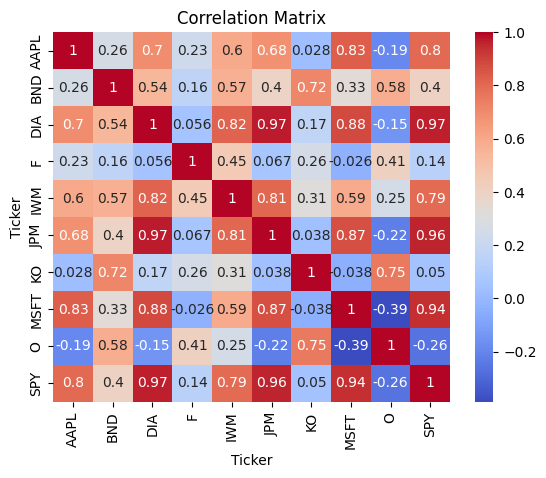

In [42]:
# plotting the correlation method in a Heatmap. credit to Alex Guerrero
sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.show()